# Logistic Regression

## **Table of Contents:**
* [Setting Up](#1)
* [Logistic Regression](#2)

## Setting Up <a class="anchor" id="1"></a>

In [1]:
#pip install recordlinkage

In [2]:
import recordlinkage
import pandas as pd

In [3]:
from recordlinkage.datasets import load_febrl4

In [4]:
dfA, dfB, true_links = load_febrl4(return_links=True)
print("Dataset A")
display(dfA.sort_index().head())
print("Dataset B")
display(dfB.sort_index().head())

Dataset A


,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-0-org,rachael,dent,1,knox street,lakewood estate,byford,4129,vic,19280722,1683994
rec-1-org,isabella,everett,25,pike place,rowethorpe,marsden,2152,nsw,19110816,6653129
rec-10-org,lachlan,reid,5,carrington road,legacy vlge,yagoona,2464,nsw,19500531,3232033
rec-100-org,hayden,stapley,38,tindale street,villa 2,cromer heights,4125,vic,NaN,4620080
rec-1000-org,victoria,zbierski,70,wybalena grove,inverneath,paralowie,5065,nsw,19720503,1267612


Dataset B


,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-0-dup-0,rachael,dent,4,knox street,lakewood estate,byford,4129,vic,19280722,1683994
rec-1-dup-0,isabella,everett,25,pike mlace,rowethorpe,marsden,2152,nsw,19110816,6653129
rec-10-dup-0,lachlnn,reid,5,carrington road,legacy vlge,yagoona,2446,nsw,19500531,3232033
rec-100-dup-0,hayden,stapley,NaN,tindale street,villa 2,cromer heights,4125,vic,NaN,4620080
rec-1000-dup-0,victoria,zbierski,70,wybalena grove,inverbeath,paralowie,5065,nsw,19720503,1267612


In [20]:
from recordlinkage.preprocessing import phonetic

# Add a phonetic version of the first and last names to the two datasets
dfA["phonetic_given_name"] = phonetic(dfA["given_name"], "soundex")
dfB["phonetic_given_name"] = phonetic(dfB["given_name"], "soundex")
dfA["phonetic_surname"] = phonetic(dfA["surname"], "soundex")
dfB["phonetic_surname"] = phonetic(dfB["surname"], "soundex")

# I'm also adding "initials"
dfA["initials"] = (dfA["given_name"].str[0]  + dfA["surname"].str[0])
dfB["initials"] = (dfB["given_name"].str[0]  + dfB["surname"].str[0])

# Cast the social security number to a "numeric"
dfA['soc_sec_id']= pd.to_numeric(dfA['soc_sec_id'])
dfB['soc_sec_id']= pd.to_numeric(dfB['soc_sec_id'])

# Print out examples of new columsn in dataframe A, these are the new columns...
print("\n\nAfter doing the same thing to our actual dataset...")
display(dfA[["given_name", "phonetic_given_name", "surname", "phonetic_surname", "initials", "soc_sec_id"]].head())



After doing the same thing to our actual dataset...


,given_name,phonetic_given_name,surname,phonetic_surname,initials,soc_sec_id
rec_id,,,,,,
rec-1070-org,michaela,M240,neumann,N550,mn,5304218
rec-1016-org,courtney,C635,painter,P536,cp,4066625
rec-4405-org,charles,C642,green,G650,cg,4365168
rec-1288-org,vanessa,V520,parr,P600,vp,9239102
rec-3585-org,mikayla,M240,malloney,M450,mm,7207688


In [21]:
indexer = recordlinkage.Index()
indexer.block('initials')
candidate_links = indexer.index(dfA, dfB)

len(candidate_links)

103510

In [22]:
from recordlinkage import Compare
compare = Compare()

# Options for "string" method argument are 
# [‘jaro’, ‘jarowinkler’, ‘levenshtein’, ‘damerau_levenshtein’, 
# ‘qgram’, ‘cosine’, ‘smith_waterman’, ‘lcs’]. Default: ‘levenshtein’

# Options for "numeric" method argument are 
# [‘step’, ‘linear’, ‘exp’, ‘gauss’ or ‘squared’]. Default ‘linear’.
compare.exact('phonetic_given_name', 'phonetic_given_name', label="phonetic_given_name")
compare.exact('phonetic_surname', 'phonetic_surname', label='phonetic_surname')
compare.string('given_name', 'given_name', method='jarowinkler', label="given_name")
compare.string('surname', 'surname', method='jarowinkler', label="surname")
compare.string('suburb', 'suburb', method='jarowinkler', label="suburb")
compare.string('state', 'state', method='jarowinkler', label="state")
compare.string('address_1', 'address_1', method='jarowinkler', label="address_1")
compare.numeric("soc_sec_id","soc_sec_id", label="soc_sec_id")

features = compare.compute(candidate_links, dfA, dfB)
features

phonetic_given_name  phonetic_surname  \
rec_id_1     rec_id_2                                                
rec-1070-org rec-2820-dup-0                    0                 0   
             rec-684-dup-0                     0                 0   
             rec-2942-dup-0                    1                 0   
             rec-2283-dup-0                    0                 0   
             rec-992-dup-0                     0                 0   
...                                          ...               ...   
rec-3662-org rec-3662-dup-0                    1                 1   
rec-705-org  rec-705-dup-0                     0                 1   
rec-2799-org rec-705-dup-0                     0                 0   
rec-1395-org rec-1395-dup-0                    1                 1   
             rec-511-dup-0                     0                 0   

                             given_name   surname    suburb     state  \
rec_id_1     rec_id_2                                                   
rec-1070-org rec-2820-dup-0    0.638889  0.523810  0.410256  1.000000   
             rec-684-dup-0     0.638889  0.642857  0.485897  1.000000   
             rec-2942-dup-0    0.823810  0.642857  0.442002  1.000000   
             rec-2283-dup-0    0.648148  0.676190  0.529915  0.000000   
             rec-992-dup-0     0.583333  0.539683  0.646724  0.000000   
...                                 ...       ...       ...       ...   
rec-3662-org rec-3662-dup-0    1.000000  1.000000  1.000000  1.000000   
rec-705-org  rec-705-dup-0     0.893333  0.981818  0.975735  1.000000   
rec-2799-org rec-705-dup-0     0.730000  0.396970  0.492157  0.666667   
rec-1395-org rec-1395-dup-0    1.000000  1.000000  0.981818  1.000000   
             rec-511-dup-0     0.600000  0.455556  0.316667  1.000000   

                             address_1  soc_sec_id  
rec_id_1     rec_id_2                               
rec-1070-org rec-2820-dup-0   0.571429         0.0  
             rec-684-dup-0    0.826840         0.0  
             rec-2942-dup-0   0.574481         0.0  
             rec-2283-dup-0   0.383117         0.0  
             rec-992-dup-0    0.515873         0.0  
...                                ...         ...  
rec-3662-org rec-3662-dup-0   1.000000         1.0  
rec-705-org  rec-705-dup-0    0.442593         1.0  
rec-2799-org rec-705-dup-0    0.476068         0.0  
rec-1395-org rec-1395-dup-0   1.000000         1.0  
             rec-511-dup-0    0.745299         0.0  

[103510 rows x 8 columns]

## Logistic Regression <a class="anchor" id="2"></a>

In [23]:
features['Target']=features.index.isin(true_links)
features['Target']=features['Target'].astype(int)

In [24]:
features.head()

phonetic_given_name  phonetic_surname  \
rec_id_1     rec_id_2                                                
rec-1070-org rec-2820-dup-0                    0                 0   
             rec-684-dup-0                     0                 0   
             rec-2942-dup-0                    1                 0   
             rec-2283-dup-0                    0                 0   
             rec-992-dup-0                     0                 0   

                             given_name   surname    suburb  state  address_1  \
rec_id_1     rec_id_2                                                           
rec-1070-org rec-2820-dup-0    0.638889  0.523810  0.410256    1.0   0.571429   
             rec-684-dup-0     0.638889  0.642857  0.485897    1.0   0.826840   
             rec-2942-dup-0    0.823810  0.642857  0.442002    1.0   0.574481   
             rec-2283-dup-0    0.648148  0.676190  0.529915    0.0   0.383117   
             rec-992-dup-0     0.583333  0.539683  0.646724    0.0   0.515873   

                             soc_sec_id  Target  
rec_id_1     rec_id_2                            
rec-1070-org rec-2820-dup-0         0.0       0  
             rec-684-dup-0          0.0       0  
             rec-2942-dup-0         0.0       0  
             rec-2283-dup-0         0.0       0  
             rec-992-dup-0          0.0       0

In [25]:
features['Target'].value_counts()

0    99778
1     3732
Name: Target, dtype: int64

In [26]:
data=features.reset_index(drop=True)

In [27]:
X=data.drop(['Target'],axis=1)
Y=data['Target']

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [29]:
lr=LogisticRegression(class_weight="balanced")
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
y_pred1=lr.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [31]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19930
           1       1.00      0.97      0.98       772

    accuracy                           1.00     20702
   macro avg       1.00      0.99      0.99     20702
weighted avg       1.00      1.00      1.00     20702



<AxesSubplot:>

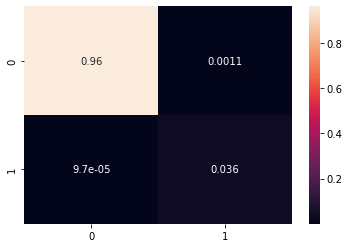

In [32]:
cm=confusion_matrix(y_test,y_pred1)
import seaborn as sns
sns.heatmap(cm/len(y_test),annot=True)

In [33]:
coef=lr.coef_
import numpy as np
coef=np.squeeze(coef, axis=0)
labels=list(X_train.columns)
Features=pd.DataFrame()
Features['Names']=labels
Features['Weights']=coef
Features.sort_values(by=['Weights'],inplace=True,ascending=False)

In [34]:
Features

,Names,Weights
7,soc_sec_id,9.795109
4,suburb,7.000827
2,given_name,6.704811
6,address_1,5.481709
3,surname,5.247982
5,state,3.918714
1,phonetic_surname,2.472812
0,phonetic_given_name,1.712121
